In [111]:
#import librairies 
import pandas as pd
import numpy as np
import warnings

# Ignorer les avertissements FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv("hashed_wab_reviews.csv")




In [94]:
df.head()

,id,date,userName,userUrl,version,score,title,text,url,country,appId
0,10990027692,2024-02-28T13:15:16-07:00,a71209417cc69068db96287dcfa258e84a19b36c443521...,c6434d50f03dc3225343d08cb75b120e19dc21937007da...,24.4.78,1,Status sounds,No sound comes from status videos after I upda...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
1,10939311897,2024-02-14T14:47:02-07:00,9f7302dde70e971b057aa14cec1d26479a9362da32e9ed...,55105d432b1d6c664523f5de2576a199f8ffa8d8c20e8a...,24.3.76,2,Calls,"Every time I’m on a phone call, it either cut ...",https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
2,10932303253,2024-02-12T15:54:56-07:00,ee939200223a21c2bdea5d17ef0ae2d9a03acfbb914c73...,1c044d9599692ebd0d50f4fb8d886f622ee02c549d76f8...,24.3.76,4,Recommendations,I like being to have a separate account/app fo...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
3,10859859638,2024-01-24T12:47:22-07:00,10c5a49c9a79ddf4cd973abd6f125b5bf98d9e6cf22fbd...,f713d7f8bf1c1400a223d76013914de72a242f8113163a...,24.1.80,5,Subject: Request for Premium Features in Whats...,"Dear WhatsApp Support Team,\n\nI hope this mes...",https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
4,10758670982,2023-12-29T05:13:49-07:00,83481ba5686098a9f7b2b9e374dc5ed7a3627bcd5eb28f...,59528539b374bc7bc8941a2785953ba58da70690e9fdd8...,23.25.86,2,Not satisfied yet,Only seems like someone clicks on your ad when...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985


In [6]:
#let's see if there is any missong data 

# Calculer le pourcentage de valeurs manquantes dans chaque colonne
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


id          0.0
date        0.0
userName    0.0
userUrl     0.0
version     0.0
score       0.0
title       0.0
text        0.0
url         0.0
country     0.0
appId       0.0
dtype: float64


In [7]:
#data type for our column 
df.dtypes

id                              int64
date        datetime64[ns, UTC-07:00]
userName                       object
userUrl                        object
version                        object
score                           int64
title                          object
text                           object
url                            object
country                        object
appId                           int64
dtype: object

In [8]:
#CHANGE data type of columns 
df['date'] = pd.to_datetime(df['date'])

In [140]:
df.head()

,id,date,userName,userUrl,version,score,title,text,url,country,appId
0,10990027692,2024-02-28T13:15:16-07:00,a71209417cc69068db96287dcfa258e84a19b36c443521...,c6434d50f03dc3225343d08cb75b120e19dc21937007da...,24.4.78,1,Status sounds,No sound comes from status videos after I upda...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
1,10939311897,2024-02-14T14:47:02-07:00,9f7302dde70e971b057aa14cec1d26479a9362da32e9ed...,55105d432b1d6c664523f5de2576a199f8ffa8d8c20e8a...,24.3.76,2,Calls,"Every time I’m on a phone call, it either cut ...",https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
2,10932303253,2024-02-12T15:54:56-07:00,ee939200223a21c2bdea5d17ef0ae2d9a03acfbb914c73...,1c044d9599692ebd0d50f4fb8d886f622ee02c549d76f8...,24.3.76,4,Recommendations,I like being to have a separate account/app fo...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
3,10859859638,2024-01-24T12:47:22-07:00,10c5a49c9a79ddf4cd973abd6f125b5bf98d9e6cf22fbd...,f713d7f8bf1c1400a223d76013914de72a242f8113163a...,24.1.80,5,Subject: Request for Premium Features in Whats...,"Dear WhatsApp Support Team,\n\nI hope this mes...",https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
4,10758670982,2023-12-29T05:13:49-07:00,83481ba5686098a9f7b2b9e374dc5ed7a3627bcd5eb28f...,59528539b374bc7bc8941a2785953ba58da70690e9fdd8...,23.25.86,2,Not satisfied yet,Only seems like someone clicks on your ad when...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985


In [9]:
#create year column 
df['year_month_day'] = df['date'].dt.year.astype(str) + '-' + df['date'].dt.month.astype(str) + '-' + df['date'].dt.day.astype(str)


In [10]:
df = df.sort_values(by=['year_month_day'], inplace=False , ascending=False)

In [104]:
pd.set_option('display.max_rows' , None)

In [105]:
df.drop_duplicates()

,id,date,userName,userUrl,version,score,title,text,url,country,appId,year_month_day
775,11015987017,2024-03-06 14:10:18-07:00,f9a2d8f1695c26dac212556c1029fb2f3b886b0c3b5769...,1ed6d21f380aeb191a5bee372705dcb4cdbd2055b5efe8...,24.4.78,2,Glitching after updating,The app status keeps glitching after updating ...,https://itunes.apple.com/us/review?id=13864129...,US,1386412985,2024-3-6
776,11014233928,2024-03-06 03:47:57-07:00,1b97c9ffdf04b39609cdcacc760a5ac3f72ec870826986...,1da91dd965d77ec4f1abfef136b92566aa0b3cc9b93412...,24.4.78,5,Review,It’s an amazing app run by a bunch of liberal ...,https://itunes.apple.com/us/review?id=13864129...,US,1386412985,2024-3-6
777,11014011369,2024-03-06 02:18:22-07:00,fe39854f14b12405336b3ce8da1f0deb3b66aade17e648...,13b9fa7d9f1780d46f641a53e82d3b467e504eff1cfa63...,24.4.78,2,Where is the report icon???,Please turn on a report icon i am not getting ...,https://itunes.apple.com/us/review?id=13864129...,US,1386412985,2024-3-6
351,11012483995,2024-03-05 14:57:50-07:00,3244730e9528a7e2ee9133f701fc89ae1fd11951e4ce4e...,94d3c0ab066245d9ad726bb407013ea227914d69c37e23...,24.4.78,5,Misbehaving,My WhatsApp has been strange 😒😒😒,https://itunes.apple.com/ca/review?id=13864129...,CA,1386412985,2024-3-5
778,11013159034,2024-03-05 19:36:04-07:00,3ba306b539a0b4e3643cf26f50ac93edc38bf36fe30d8c...,b0c0a214c221da231f402fe3f50528a0cac62e7b78c544...,24.4.78,5,Ikechukwu,The app is amazing ❤️,https://itunes.apple.com/us/review?id=13864129...,US,1386412985,2024-3-5
779,11011874189,2024-03-05 10:55:42-07:00,b868b695b5e6df366d178fc3aa9264195d663145eede8b...,036bdc0497c93fed2f8f2f0bfce099b049961ca7ac2f5b...,24.4.78,5,Quick and Easy,Using WhatsApp helps me be efficient and produ...,https://itunes.apple.com/us/review?id=13864129...,US,1386412985,2024-3-5
780,11008504823,2024-03-04 13:00:43-07:00,17e4296353c18ab62c8ba577444f16089b713838ea3955...,e370773a014b4fc6007226ac4985bc8537c04085907bf9...,24.4.78,5,Good,Good,https://itunes.apple.com/us/review?id=13864129...,US,1386412985,2024-3-4
781,11007965230,2024-03-04 09:29:19-07:00,a5bd69c36c9beac7ade5ee3d442155d4ed2d6c000f8a42...,b0823eab66e1f0935cb03828a6866123d2f8acfe880353...,24.4.78,5,👌,😉☺️👍,https://itunes.apple.com/us/review?id=13864129...,US,1386412985,2024-3-4
782,11007381707,2024-03-04 06:10:50-07:00,687c314a7d881196a4e411b089a534aec84bb5a59a2d81...,700ff6651cc241463e5389078cbd31a33c996ee3559d14...,24.4.78,5,Trouble transferring chats,"Hello, please I changed my phone and I'm havin...",https://itunes.apple.com/us/review?id=13864129...,US,1386412985,2024-3-4
783,11005562637,2024-03-03 16:53:40-07:00,052ada8eaa06bd61c4826e67770eab1a4ffef47ea62ad2...,467952c5a5261b4269125f60547f7a033b5ecf5bd69874...,24.4.78,4,Excelente,Buena buena,https://itunes.apple.com/us/review?id=13864129...,US,1386412985,2024-3-3


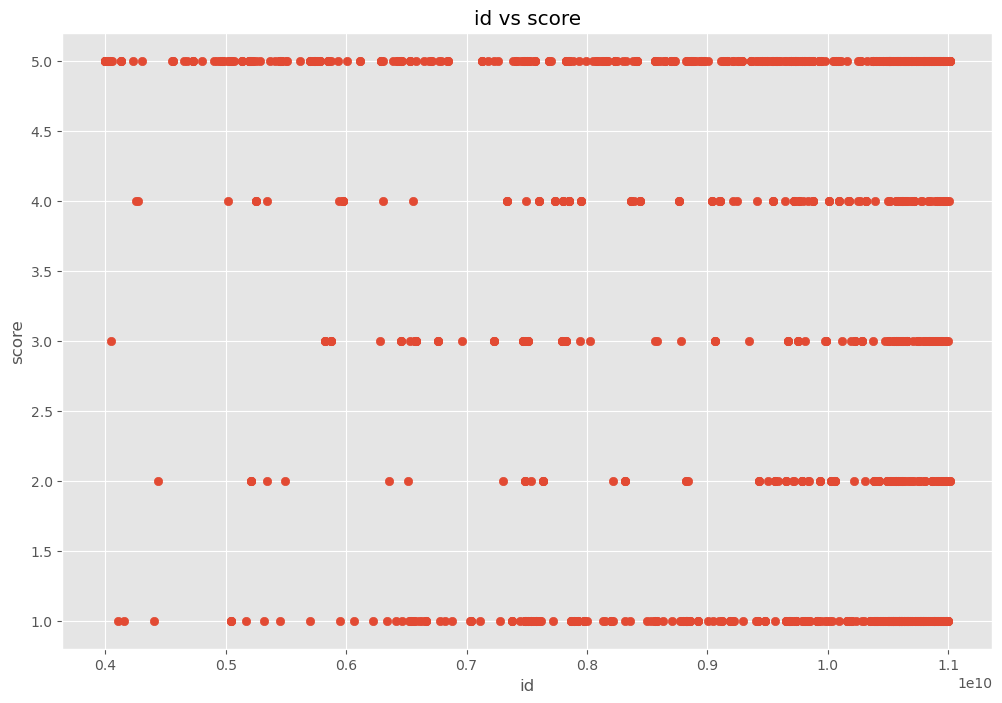

In [106]:
#scatter plot with date vs country 
plt.scatter(x=df['id'], y=df['score'])
plt.title('id vs score') 
plt.xlabel('id') 
plt.ylabel('score')
plt.show()

In [107]:
df.head()

,id,date,userName,userUrl,version,score,title,text,url,country,appId,year_month_day
775,11015987017,2024-03-06 14:10:18-07:00,f9a2d8f1695c26dac212556c1029fb2f3b886b0c3b5769...,1ed6d21f380aeb191a5bee372705dcb4cdbd2055b5efe8...,24.4.78,2,Glitching after updating,The app status keeps glitching after updating ...,https://itunes.apple.com/us/review?id=13864129...,US,1386412985,2024-3-6
776,11014233928,2024-03-06 03:47:57-07:00,1b97c9ffdf04b39609cdcacc760a5ac3f72ec870826986...,1da91dd965d77ec4f1abfef136b92566aa0b3cc9b93412...,24.4.78,5,Review,It’s an amazing app run by a bunch of liberal ...,https://itunes.apple.com/us/review?id=13864129...,US,1386412985,2024-3-6
777,11014011369,2024-03-06 02:18:22-07:00,fe39854f14b12405336b3ce8da1f0deb3b66aade17e648...,13b9fa7d9f1780d46f641a53e82d3b467e504eff1cfa63...,24.4.78,2,Where is the report icon???,Please turn on a report icon i am not getting ...,https://itunes.apple.com/us/review?id=13864129...,US,1386412985,2024-3-6
351,11012483995,2024-03-05 14:57:50-07:00,3244730e9528a7e2ee9133f701fc89ae1fd11951e4ce4e...,94d3c0ab066245d9ad726bb407013ea227914d69c37e23...,24.4.78,5,Misbehaving,My WhatsApp has been strange 😒😒😒,https://itunes.apple.com/ca/review?id=13864129...,CA,1386412985,2024-3-5
778,11013159034,2024-03-05 19:36:04-07:00,3ba306b539a0b4e3643cf26f50ac93edc38bf36fe30d8c...,b0c0a214c221da231f402fe3f50528a0cac62e7b78c544...,24.4.78,5,Ikechukwu,The app is amazing ❤️,https://itunes.apple.com/us/review?id=13864129...,US,1386412985,2024-3-5


In [110]:
# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=np.number)

# Calculer la corrélation entre les colonnes numériques
correlation_matrix = numeric_df.corr(method='pearson')


# Afficher la matrice de corrélation
print(correlation_matrix)

             id     score  appId
id     1.000000 -0.171052    NaN
score -0.171052  1.000000    NaN
appId       NaN       NaN    NaN


In [ ]:
#hight correlation between id and date 

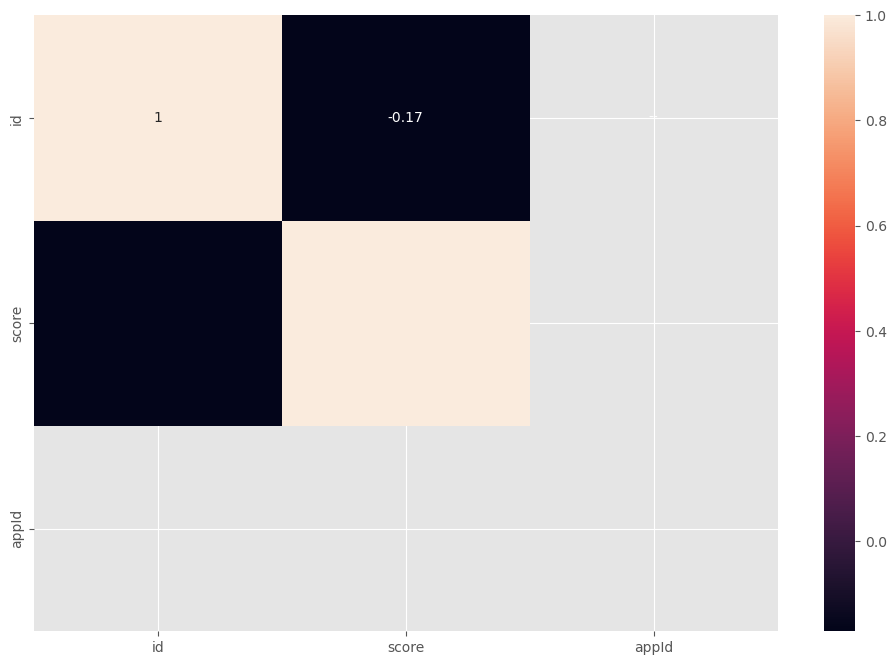

In [113]:
# Tracer la heatmap avec des annotations en spécifiant un format explicite
sns.heatmap(correlation_matrix, annot=True)

# Afficher le graphique
plt.show()

In [137]:
df_numerized   

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':  # Vérifiez si le type de données de la colonne est un objet (chaîne de caractères)
        df_numerized[col_name] = df_numerized[col_name].astype('category')  # Convertissez le type de données en 'category'
        df_numerized[col_name] = df_numerized[col_name].cat.codes  # Encodez les catégories en codes numériques

# Afficher le DataFrame modifié
df_numerized.head()

,id,date,userName,userUrl,version,score,title,text,url,country,appId
0,10990027692,1073,684,842,147,1,693,586,0,0,1386412985
1,10939311897,1030,658,390,146,2,140,151,0,0,1386412985
2,10932303253,1021,1013,113,146,4,629,348,0,0,1386412985
3,10859859638,950,70,1052,144,5,708,110,0,0,1386412985
4,10758670982,849,524,411,131,2,553,612,0,0,1386412985


In [129]:
df_numerized.corr()

,id,date,userName,userUrl,version,score,title,text,url,country,appId
id,1.000000,0.850775,0.018039,-0.015984,0.956438,-0.171052,0.034864,-0.034667,0.484003,0.484003,NaN
date,0.850775,1.000000,0.010795,-0.016169,0.851563,-0.116915,0.049874,-0.004845,0.583867,0.583867,NaN
userName,0.018039,0.010795,1.000000,0.006632,-0.015946,-0.040330,-0.027671,-0.024050,0.011262,0.011262,NaN
userUrl,-0.015984,-0.016169,0.006632,1.000000,-0.005551,0.037447,-0.011138,0.056730,0.004082,0.004082,NaN
version,0.956438,0.851563,-0.015946,-0.005551,1.000000,-0.141309,0.051417,-0.033135,0.470792,0.470792,NaN
score,-0.171052,-0.116915,-0.040330,0.037447,-0.141309,1.000000,0.040809,0.047209,-0.021678,-0.021678,NaN
title,0.034864,0.049874,-0.027671,-0.011138,0.051417,0.040809,1.000000,0.201114,0.044174,0.044174,NaN
text,-0.034667,-0.004845,-0.024050,0.056730,-0.033135,0.047209,0.201114,1.000000,0.084982,0.084982,NaN
url,0.484003,0.583867,0.011262,0.004082,0.470792,-0.021678,0.044174,0.084982,1.000000,1.000000,NaN
country,0.484003,0.583867,0.011262,0.004082,0.470792,-0.021678,0.044174,0.084982,1.000000,1.000000,NaN


In [132]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

id        id          1.000000
          date        0.850775
          userName    0.018039
          userUrl    -0.015984
          version     0.956438
          score      -0.171052
          title       0.034864
          text       -0.034667
          url         0.484003
          country     0.484003
          appId            NaN
date      id          0.850775
          date        1.000000
          userName    0.010795
          userUrl    -0.016169
          version     0.851563
          score      -0.116915
          title       0.049874
          text       -0.004845
          url         0.583867
          country     0.583867
          appId            NaN
userName  id          0.018039
          date        0.010795
          userName    1.000000
          userUrl     0.006632
          version    -0.015946
          score      -0.040330
          title      -0.027671
          text       -0.024050
          url         0.011262
          country     0.011262
        

In [133]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

score     id         -0.171052
id        score      -0.171052
score     version    -0.141309
version   score      -0.141309
date      score      -0.116915
score     date       -0.116915
          userName   -0.040330
userName  score      -0.040330
text      id         -0.034667
id        text       -0.034667
version   text       -0.033135
text      version    -0.033135
userName  title      -0.027671
title     userName   -0.027671
userName  text       -0.024050
text      userName   -0.024050
url       score      -0.021678
score     country    -0.021678
          url        -0.021678
country   score      -0.021678
date      userUrl    -0.016169
userUrl   date       -0.016169
          id         -0.015984
id        userUrl    -0.015984
version   userName   -0.015946
userName  version    -0.015946
userUrl   title      -0.011138
title     userUrl    -0.011138
version   userUrl    -0.005551
userUrl   version    -0.005551
text      date       -0.004845
date      text       -0.004845
userUrl 

In [134]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

date      country     0.583867
          url         0.583867
url       date        0.583867
country   date        0.583867
date      id          0.850775
id        date        0.850775
version   date        0.851563
date      version     0.851563
version   id          0.956438
id        version     0.956438
url       country     1.000000
id        id          1.000000
text      text        1.000000
title     title       1.000000
score     score       1.000000
country   url         1.000000
version   version     1.000000
userUrl   userUrl     1.000000
userName  userName    1.000000
date      date        1.000000
url       url         1.000000
country   country     1.000000
dtype: float64